In [10]:
import numpy as np

#random numbers
# np.random.seed(123)
# np.random.uniform(size=10)
# np.random.binomial(n=1, p=0.4, size=10)
# np.random.normal(loc=0, scale=1, size=10)

**Covid Simulation**

In [25]:
# define function
def average_n_tests(p, n=5000, seed=123): # p = covid positive%

    np.random.seed(seed)
    n_tests = []

    for i in range(n):
        s = np.random.binomial(n=1, p=p, size=5)
        
        if max(s) == 1:
            T = np.random.binomial(n=1, p=0.9)
        else:
            T = np.random.binomial(n=1, p=0.02)
        
        if T == 0:
            n_tests.append(0.2)
        else:
            n_tests.append(1.2)
    
    return [np.mean(n_tests), np.std(n_tests)]

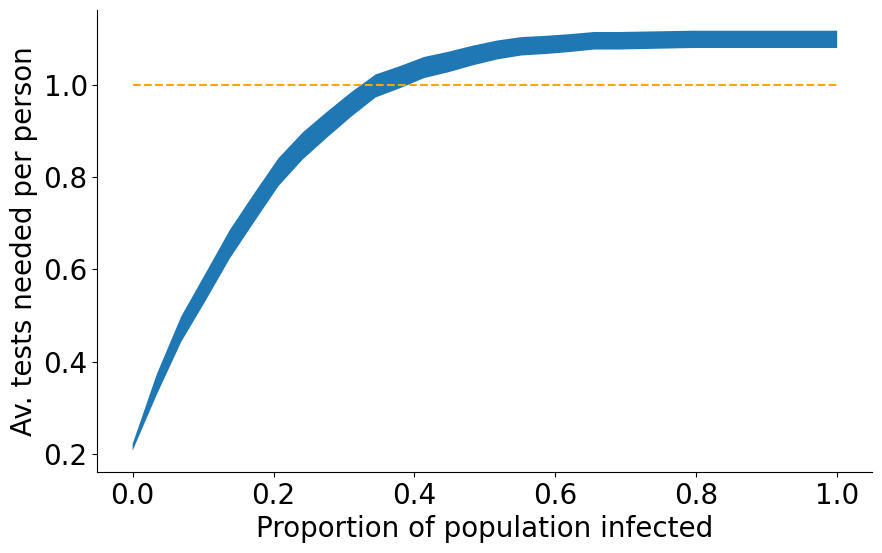

In [33]:
# feed the function & visualization
ps = np.linspace(0, 1, num=30)
sim_results = [average_n_tests(p, n = 1000) for p in ps]

av_n_tests = [i[0] for i in sim_results]
sd_n_tests = [i[1] for i in sim_results]

ucl = [i + 1.96*j/np.sqrt(n) for i, j in zip(av_n_tests, sd_n_tests)]
lcl = [i - 1.96*j/np.sqrt(n) for i, j in zip(av_n_tests, sd_n_tests)]

plt.figure(figsize=(10, 6))
plt.fill_between(ps, lcl, ucl)
plt.plot([0, 1], [1, 1], linestyle='--', color='orange')
plt.xlabel('Proportion of population infected', fontsize=20)
plt.ylabel('Av. tests needed per person', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.despine()